# <b>Videogame sales analysis 1980-2015</b>

Author: Osman Muglu

Date Created: 01-03-2021

Data source: https://www.kaggle.com/gregorut/videogamesales

## Index


<ol>
    <li>Forming the dataframe</li>
    <li>Exploratory data analysis</li>
    <li>Conclusion</li>
</ol>

# <b>1. Forming The Dataframe</b>

### 1.1 Importing The Required Packages

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set_style('whitegrid')

In this data set are 11 columns, these are:
<ul>
<li><b>Rank</b> - Ranking of overall sales, </li>
<li><b>Name</b> - The games name</li>
<li><b>Platform</b> - Platform of the games release (i.e. PC,PS4, etc.),</li>
<li><b>Year</b> - Year of the game's release</li>
<li><b>Genre</b> - Genre of the game </li>
<li><b>Publisher</b> - Publisher of the game,</li>
<li><b>NA_Sales</b> - Sales in North America (in millions)</li>
<li><b>EU_Sales</b> - Sales in Europe (in millions)</li>
<li><b>JP_Sales</b> - Sales in Japan (in millions)</li>
<li><b>Other_Sales</b> - Sales in the rest of the world (in millions)</li>
<li><b>Global_Sales</b> - Total worldwide sales</li>
</ul>  

### 1.2 Read The CSV File

In [2]:
df= pd.read_csv("vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
df.shape

(16598, 11)

### 1.3 Dropping Data

In [4]:
drop_data = df[df['Year'] > 2015].index
df = df.drop(drop_data)
df.drop(["Rank"], axis=1, inplace=True)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### 1.4 Search Function

In [5]:
def search(x):

    if df.loc[df['Name']==x].shape[0] > 0:
        return df.loc[df['Name']==x]
    elif df.loc[df['Platform']==x].shape[0] > 0:
        return df.loc[df['Platform']==x]
    elif df.loc[df['Year']==x].shape[0] > 0:
        return df.loc[df['Year']==x]
    elif df.loc[df['Genre']==x].shape[0] > 0:
        return df.loc[df['Genre']==x]
    elif df.loc[df['Publisher']==x].shape[0] > 0:
        return df.loc[df['Publisher']==x]
    elif int(x) in range(16250):
        return df.iloc[[x]]
    else:
        return print('Result not found in dataframe(input is case sensitive, index range is 0-16249)')

In [6]:
search('5000')

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
5039,EA Sports MMA,PS3,2010.0,Fighting,Electronic Arts,0.16,0.15,0.01,0.06,0.38


# <b>2. Explotary Data Analysis</b>


### 2.1 Dataframe Description

In [7]:
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,15979.000000,16250.000000,16250.000000,16250.000000,16250.000000,16250.000000
mean,2006.197071,0.268924,0.148146,0.078601,0.048614,0.544564
std,5.714810,0.824467,0.509035,0.312196,0.190271,1.569213
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2015.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
df.shape

(16250, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16250 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16250 non-null  object 
 1   Platform      16250 non-null  object 
 2   Year          15979 non-null  float64
 3   Genre         16250 non-null  object 
 4   Publisher     16194 non-null  object 
 5   NA_Sales      16250 non-null  float64
 6   EU_Sales      16250 non-null  float64
 7   JP_Sales      16250 non-null  float64
 8   Other_Sales   16250 non-null  float64
 9   Global_Sales  16250 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


### 2.2 Genre, Game and Publisher Analysis

#### 2.2.1 Genre With The Most Games


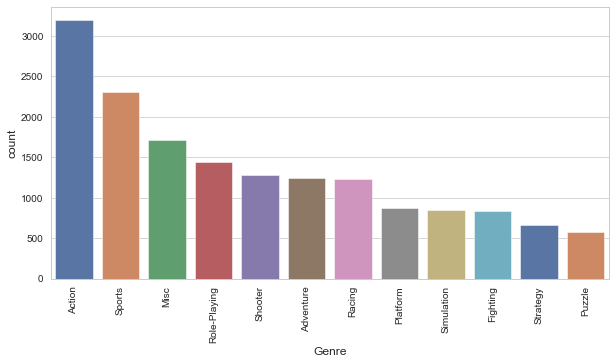

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x="Genre", data=df, palette="deep", order = df['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### 2.2.2 Top 10 Years With The Most Game Releases

In [11]:
top10_years_mg = df.groupby(['Year'])['Name'].count().sort_values(ascending=False)
top10_years_mg = pd.DataFrame(top10_years_mg).reset_index().head(10)
top10_years_mg.columns = ['Year', 'Releases' ]

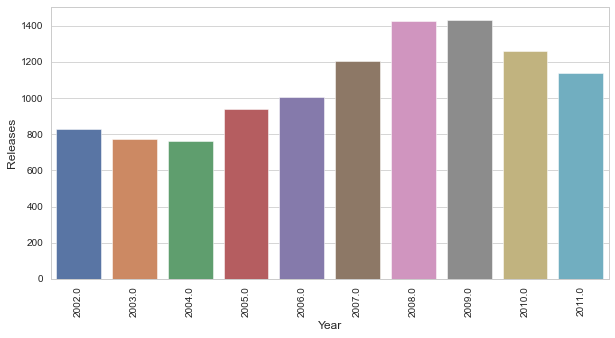

In [12]:
plt.figure(figsize=(10,5))
ax = sns.barplot(x="Year", y="Releases", palette="deep", data= top10_years_mg)
plt.xticks(rotation=90)
plt.show()

<i>---- Year with the most game releases (just code)</i>

In [13]:
top10_years_mg.loc[top10_years_mg['Releases'] == top10_years_mg['Releases'].max()] 

,Year,Releases
0,2009.0,1431


#### 2.2.3 Top 10 Years With The Highest Sales Globally

In [14]:
top10_years_hsg = df.groupby(['Year'])['Global_Sales'].sum().sort_values(ascending=False)
top10_years_hsg = top10_years_hsg.reset_index().head(10)

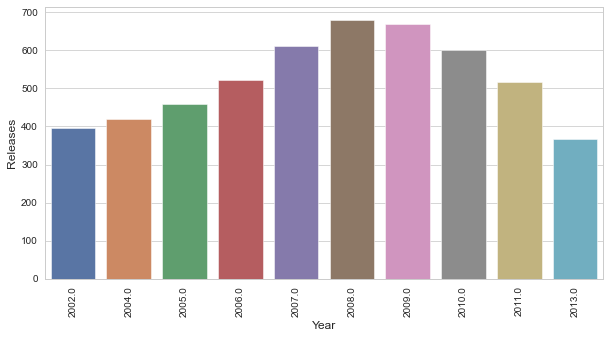

In [15]:
plt.figure(figsize=(10, 5))
sns.barplot(x="Year", y="Global_Sales", palette="deep", data = top10_years_hsg
           ).set(xlabel='Year', ylabel='Releases')
sns.color_palette("viridis", as_cmap=True)
plt.xticks(rotation=90)
plt.show()

<i>---- Year with the highest sales globally (just code)</i>

In [16]:
top10_years_hsg.loc[top10_years_hsg ['Global_Sales'] == top10_years_hsg ['Global_Sales'].max()] 

,Year,Global_Sales
0,2008.0,678.9


#### 2.2.4 Top 5 Genres That Have Been Released The Most In a Single Year

In [17]:
year_max_df = df.groupby(['Year', 'Genre']).size().reset_index(name='Releases')
year_max_idx = year_max_df.groupby(['Year'])['Releases'].transform(max) == year_max_df['Releases']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)

In [18]:
top5_year_max_genre = year_max_genre.sort_values('Releases',ascending=False).head(5)
V_top5_max_genre = top5_year_max_genre.sort_values('Year',ascending=True).reset_index(drop=True) 

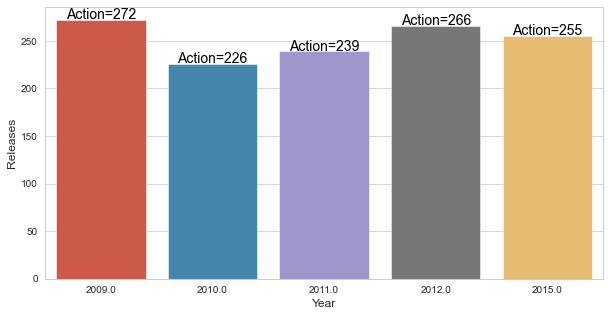

In [19]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x="Year", y="Releases", data=V_top5_max_genre)
index = 0
for value in V_top5_max_genre['Releases']:
    g.text(index, value + 1, str(V_top5_max_genre['Genre'][index] + '=' +str(round(value, 2))), color='#000', size=14, ha="center")
    index += 1
plt.show()

<i>---- Best genre that has been released the most in a single year (just code)</i>

In [20]:
year_max_genre.loc[year_max_genre['Releases'] == year_max_genre['Releases'].max()] 

,Year,Genre,Releases
39,2009.0,Action,272


#### 2.2.5 Top 5 Genres That Have Been Sold The Most Within a Single Year

In [21]:
year_s = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
year_sale = year_s.groupby(by=['Year'])['Global_Sales'].transform(max) == year_s['Global_Sales']
year_sale_max = year_s[year_sale].reset_index(drop=True)

In [22]:
top5_year_sale_max = year_sale_max.sort_values('Global_Sales',ascending=False).head(5)
V_top5_year_sale_max = top5_year_sale_max.sort_values('Year',ascending=True).reset_index(drop=True) 

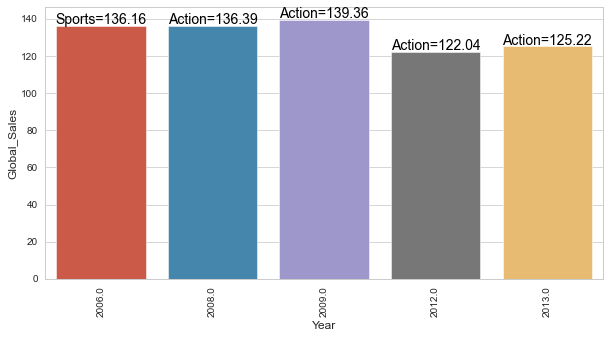

In [23]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x="Year", y="Global_Sales", data=V_top5_year_sale_max)
index = 0
for value in V_top5_year_sale_max['Global_Sales']:
    g.text(index, value + 1, str(V_top5_year_sale_max['Genre'][index] + '=' +str(round(value, 2))), color='#000', size=14, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

<i>---- Best selling genre within a single year (just code)</i>

In [24]:
year_sale_max.loc[year_sale_max['Global_Sales'] == year_sale_max['Global_Sales'].max()] 

,Year,Genre,Global_Sales
29,2009.0,Action,139.36


#### 2.2.6 Top 5 Best Selling Genres on Global Scale Ever

In [25]:
top5_genres = df.groupby(['Genre'])['Global_Sales'].sum()
top5_genres = top5_genres.reset_index()
top5_genres = top5_genres.sort_values(['Global_Sales'], ascending=False).head()
top5_genres = top5_genres.reset_index(drop=True).head()

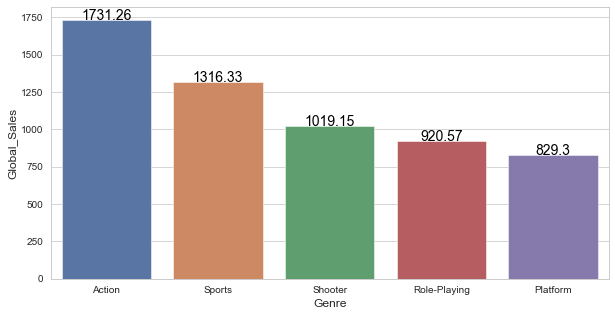

In [26]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x="Genre", y="Global_Sales", data=top5_genres, palette="deep")
index = 0
for value in top5_genres['Global_Sales']:
    g.text(index, value + 1, str((round(value, 2))), color='#000', size=14, ha="center")
    index += 1
plt.show()

<i>---- Best selling genre on global scale (just code)</i>

In [27]:
top5_genres.loc[top5_genres['Global_Sales'] == top5_genres['Global_Sales'].max()] 

,Genre,Global_Sales
0,Action,1731.26


#### 2.2.7 Top 10  Platforms With The Highest Sales Globally

In [28]:
top10_platforms = df.groupby(['Platform'])['Global_Sales'].sum()
top10_platforms = top10_platforms.reset_index()
top10_platforms = top10_platforms.sort_values(['Global_Sales'], ascending=False).head(10)

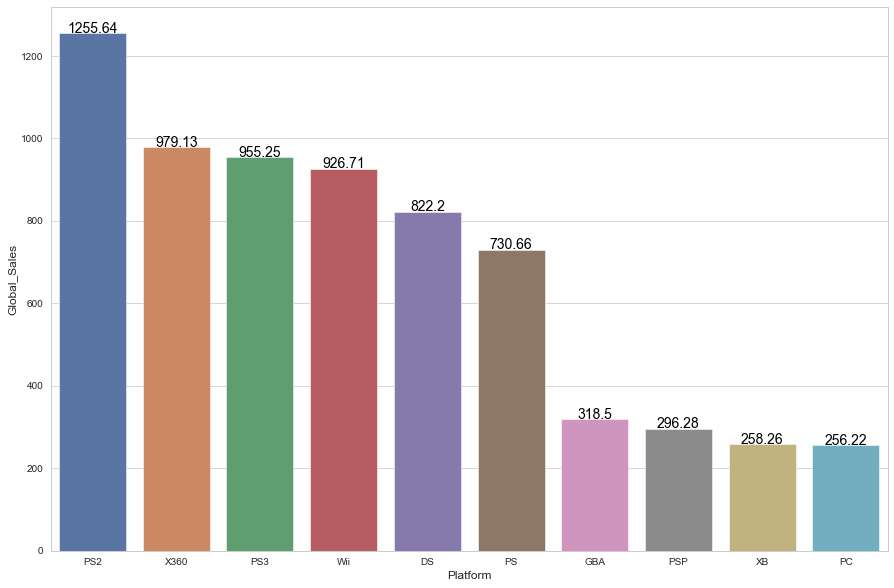

In [29]:
plt.figure(figsize=(15, 10))
g = sns.barplot(x="Platform", y="Global_Sales", data=top10_platforms, palette="deep")
index = 0
for value in top10_platforms['Global_Sales']:
    g.text(index, value + 1, str((round(value, 2))), color='#000', size=14, ha="center")
    index += 1
plt.show()




<i>---- Platform with the highest sales (just code)</i>

In [30]:
top10_platforms.loc[top10_platforms['Global_Sales'] == top10_platforms['Global_Sales'].max()] 

,Platform,Global_Sales
16,PS2,1255.64


#### 2.2.8 Top 10 Best Selling Games Worldwide

In [31]:
top10_game_sale = df.head(20)
top10_game_sale = top10_game_sale[['Name', 'Year', 'Genre', 'Global_Sales']]
top10_game_sale = top10_game_sale.sort_values(['Global_Sales'], ascending=False).head(10)

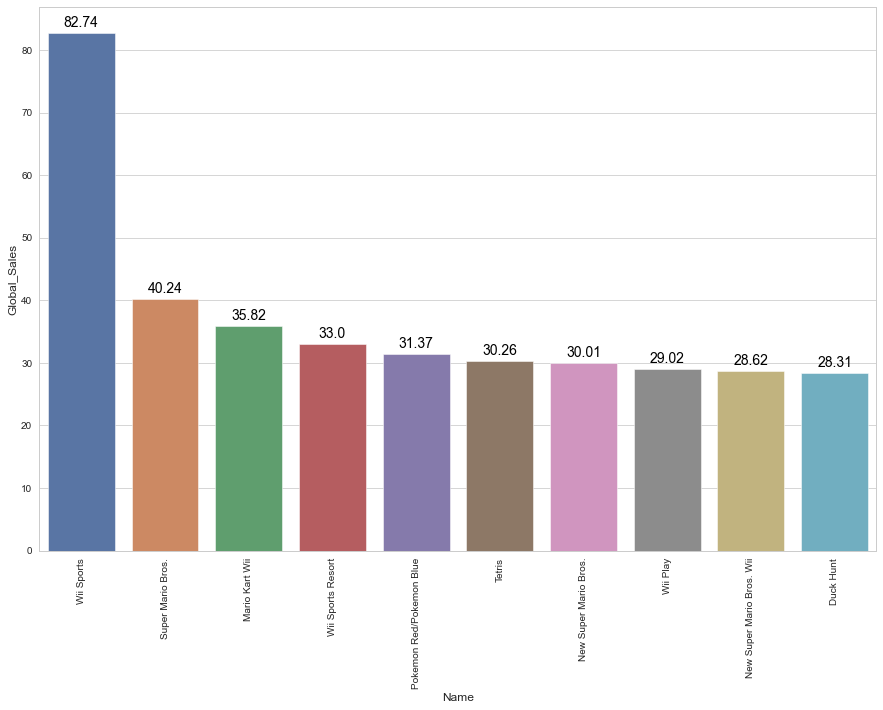

In [32]:
plt.figure(figsize=(15, 10))
g = sns.barplot(x="Name", y="Global_Sales", data=top10_game_sale, palette="deep")
index = 0
for value in top10_game_sale['Global_Sales']:
    g.text(index, value + 1, str((round(value, 2))), color='#000', size=14, ha="center")
    index += 1
    
plt.xticks(rotation=90)
plt.show()

<i>---- Beste selling game worldwide (just code)</i>

In [33]:
top10_game_sale.loc[top10_game_sale['Global_Sales'] == top10_game_sale['Global_Sales'].max()] 

,Name,Year,Genre,Global_Sales
0,Wii Sports,2006.0,Sports,82.74


#### 2.2.9 Comparing Sales Of All Genres With Each Other

In [34]:
compar_sales_g = df[['Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Other_Sales']]
v_compar_sales_g = compar_sales_g.groupby(['Genre']).sum()

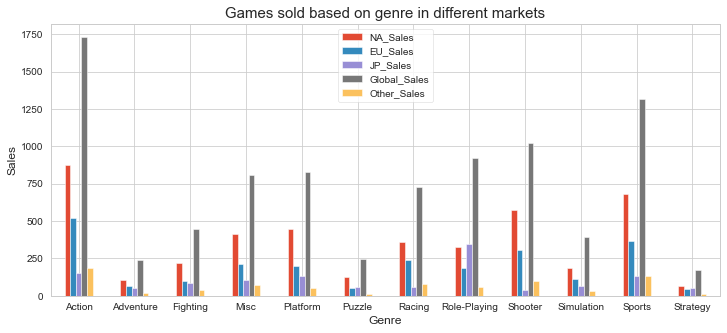

In [35]:
v_compar_sales_g.plot(kind='bar', figsize=(12, 5), rot=360)
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("Games sold based on genre in different markets", fontsize=15)
plt.show()

#### 2.2.10 Comparing Sales of All Platforms

In [36]:
compar_sales_p = df[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales', 'Other_Sales']]
v_compar_sales_p = compar_sales_p.groupby(['Platform']).sum()

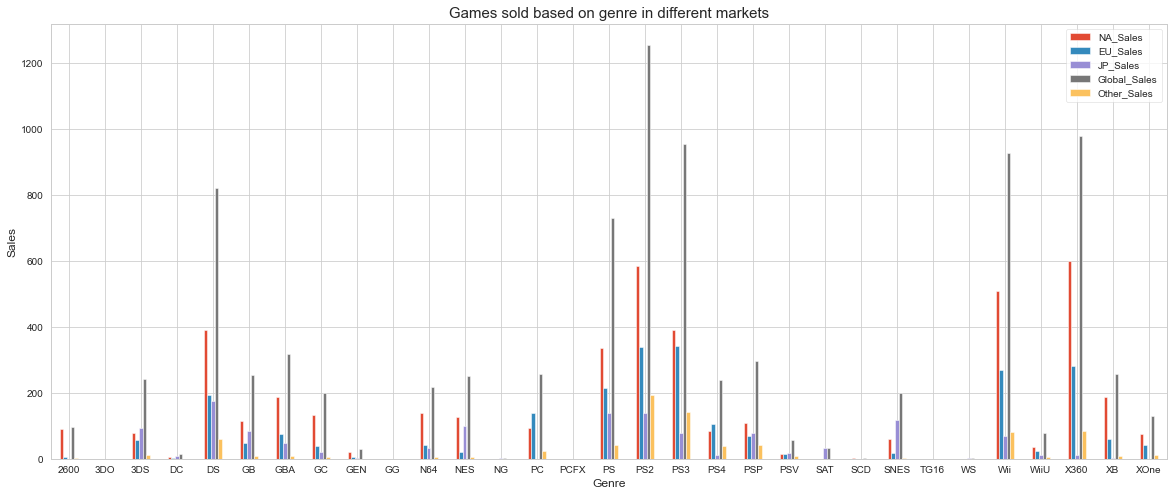

In [37]:
v_compar_sales_p.plot(kind='bar', figsize=(20,8), rot=360)
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("Games sold based on genre in different markets", fontsize=15)
plt.show()

#### 2.2.11 Top 10 Game Publishers With Most Releases

In [38]:
top10_publishers = df.groupby(['Publisher'])['Year'].count().sort_values(ascending=False).head(10)
top10_publishers = pd.DataFrame(top10_publishers).reset_index()
top10_publishers.columns = ['Publisher', 'Releases']

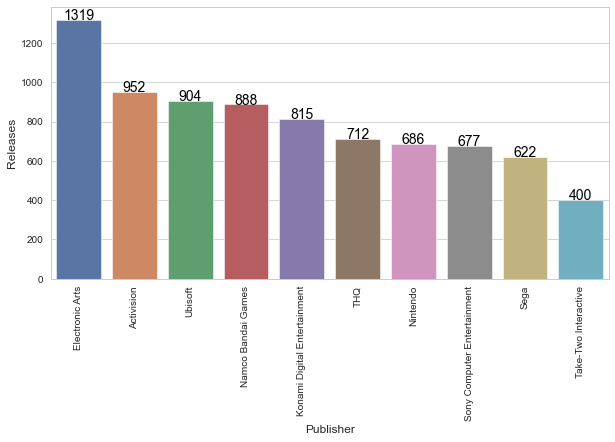

In [39]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x="Publisher", y="Releases", data=top10_publishers, palette="deep")
index = 0
for value in top10_publishers['Releases']:
    g.text(index, value + 1, str((round(value, 2))), color='#000', size=14, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

In [40]:
top10_publishers.loc[top10_publishers['Releases'] == top10_publishers['Releases'].max()] 

,Publisher,Releases
0,Electronic Arts,1319


#### 2.2.12 Top 10 Best Sales By Publishers

In [41]:
top10_sales_p = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False).head(10)
top10_sales_p = pd.DataFrame(top10_sales_p).reset_index()

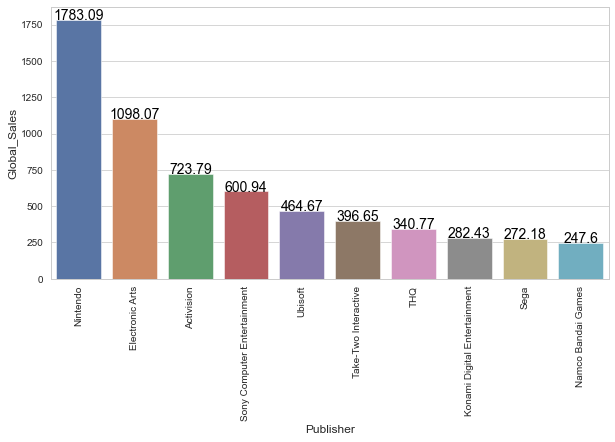

In [42]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x='Publisher', y='Global_Sales', data=top10_sales_p, palette="deep")
index = 0
for value in top10_sales_p['Global_Sales']:
    g.text(index, value + 1, str((round(value, 2))), color='#000', size=14, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

<i>---- Publisher with the highest sales (just code)</i>

In [43]:
top10_sales_p.loc[top10_sales_p['Global_Sales'] == top10_sales_p['Global_Sales'].max()] 

,Publisher,Global_Sales
0,Nintendo,1783.09


#### 2.2.13 Comparing Top 10 Pusblishers On Sales Per Region

In [44]:
Top10_pub_comp = df[['Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
Top10_pub_comp = Top10_pub_comp.groupby(['Publisher']).sum().sort_values(['Global_Sales'], ascending=False)
Top10_pub_comp = Top10_pub_comp.head(10)

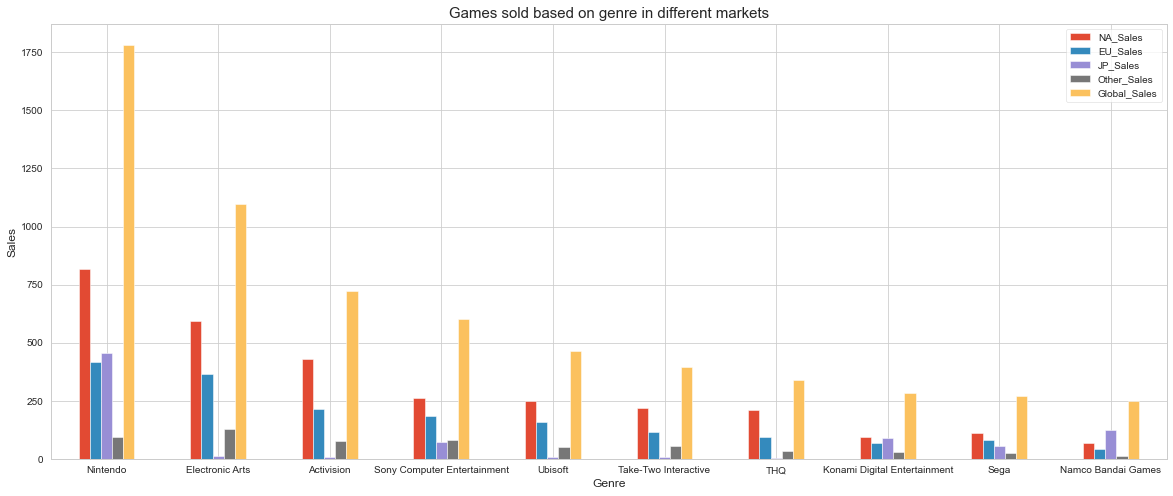

In [45]:
Top10_pub_comp.plot(kind='bar', figsize=(20,8), rot=360)
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.title("Games sold based on genre in different markets", fontsize=15)
plt.show()

#### 2.2.14 Total Sales of The Gaming Industry Per Region

In [46]:
tot_sale = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
tot_sale = tot_sale.sum().reset_index()
tot_sale = tot_sale.rename(columns={"index": "region", 0: "sale"})

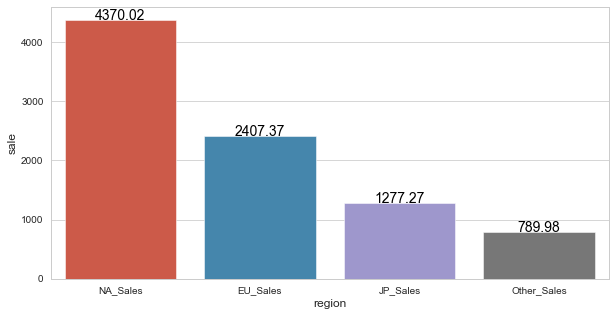

In [47]:
plt.figure(figsize=(10, 5))
g = sns.barplot(x="region", y="sale", data=tot_sale)
index = 0
for value in tot_sale['sale']:
    g.text(index, value + 1, str((round(value, 2))), color='#000', size=14, ha="center")
    index += 1
plt.show()

# <b>3. Conclusions For Videogame Sales Analysis 1980-2015</b>

<b>1. Genre With The Most Games:</b>
1. Action
2. Sports
3. Misc
4. Role-Playing
5. Shooter
6. Adventure
7. Racing
8. Platform
9. Simulation
10. Fighting
11. Strategy
12. Puzzle

<b>2. Top 10 Years With The Most Game Releases:</b>
1. 2009
2. 2008
3. 2010
4. 2007
5. 2011
6. 2006
7. 2005
8. 2002
9. 2003
10. 2004


<b>3. Top 10 Years With The Highest Sales Globally:</b>
1. 2008
2. 2009
3. 2007
4. 2010
5. 2006
6. 2011
7. 2005
8. 2004
9. 2002
10. 2013

<b>4. Top 5 Genres That Have Been Released The Most In a Single Year:</b>
1. Action with 272 in year 2009
2. Action with 266 in year 266
3. Action with 255 in year 255
4. Action with 239 year 239
5. Action with 226 year 226

<b>5. Top 5 Genres That Have Been Sold The Most Within In a Single Year:</b>
1. Action with 139,36 million in year 2009
2. Action with 136,39 millin in year 2008
3. Sports with 136,16 million in year 2006
4. Action with 125,22 million in year 2013
5. Action with 122,04 million in year 2012

<b>6. Top 5 Best Selling Genres On Global Scale Ever:</b>
1. Action with 1,7 billion 
2. Sports with 1,3 billion 
3. Shooter with 1 billion 
4. Role playing 920,57 million
5. Platform 829,30 million

<b>7. Top 10 With Platforms With The Highest Sales Globally:</b>
1. PS2 with 1,2 billion
2. X360 with 979,13 million
3. PS3 with 965,25 million
4. WII with 926,71 million
5. DS with 822,2 million
6. PS with 730,66 million
7. GBA with 318,5 million
8. PSP with 296,28 million
9. XB with 258,26 million
10. PC with 256,22 million

<b>8. Top 10 Best Selling Games Worldwide:</b>
1. Wii Sports with 82,74 million
2. Super Mario Bros. with 40,24 million
3. Mario Kart Wii with 35,82 million
4. Wii Sports Resort with 33 million
5. Pokemon Red/Pokemon with Blue 31,37 million
6. Tetris with 30,26
7. New Super Mario Bros. with 30,01 million
8. Wii Play with 29.02 million
9. New Super Mario Bros. Wii with 28.62 million
10. Duck Hunt with 28.31 million

<b>9. Top 10 Game Publishers With Most Releases:</b>
1. Electronic Arts with 1319 releases
2. Activision with 952 releases
3. Ubisoft with 904 releases
4. Namco Bandai Games with 888 releases
5. Konami Digital Entertainmen with 815 releases
6. THQ with 712 releases
7. Nintendo with 686 releases
8. Sony Computer Entertainment with 677 releases
9. Sega with 622 releases
10. Take-Two Interactive with 400 releases

<b>10. Top 10 Best Sales By Publishers:</b>
1. Nintendo with 1,7 billion 
2. Electronic Arts with 1 billion
3. Activision with 723 million
4. Sony Computer Entertainment 600 million
5. Ubisoft with 464.67 million
6. Take-Two Interactive	with 396.65 million
7. THQ with 340.77 million
8. Konami Digital Entertainment	with 282.43 million
9. Sega	with 272.18 million
10. Namco Bandai Games with 247.60 million

<b>11. Total Sales of The Gaming Industry Per region:</b>
1. NA_Sales 
2. EU_Sales	
3. JP_Sales
4. Other_Sales
